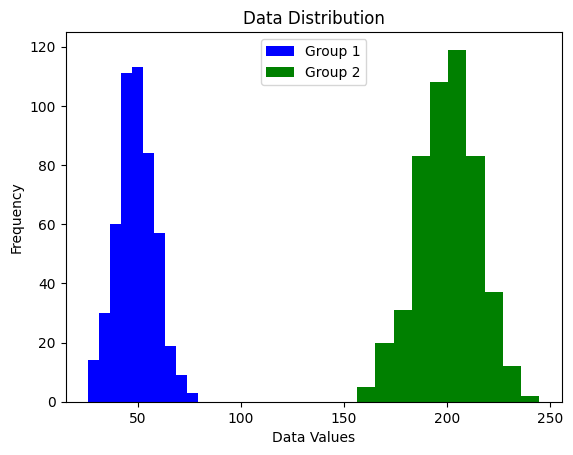

In [3]:
import numpy as np
import matplotlib.pyplot as plt


data_group1 = np.random.normal(loc=50, scale=10, size=500)
data_group2 = np.random.normal(loc=200, scale=15, size=500)


plt.hist(data_group1, label='Group 1', color='blue')
plt.hist(data_group2, label='Group 2', color='green')
plt.title("Data Distribution")
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [4]:
import tensorflow as tf

a = tf.constant([5.0, 3.0])
b = tf.constant([2.0, 7.0])
c = a + b
print("Eager Execution Output:", c.numpy())

@tf.function
def multiply_tensors(x, y):
    return x * y

result = multiply_tensors(a, b)
print("Graph Mode Output:", result.numpy())


Eager Execution Output: [ 7. 10.]
Graph Mode Output: [10. 21.]


In [ ]:
pip install gensim

In [1]:
from gensim.models import Word2Vec

sentences = [
    ["artificial", "intelligence", "is", "cool"],
    ["machine", "learning", "is", "fun"],
    ["ai", "learning", "uses", "neural", "networks"]
]

model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, sg=1)

print("Vector for 'learning':", model.wv['learning'])
print("Most similar to 'learning':", model.wv.most_similar('learning'))


Vector for 'learning': [-0.00537069  0.00235848  0.05102572  0.09009185 -0.09303681 -0.07116417
  0.06458981  0.08972324 -0.05014562 -0.03762919]
Most similar to 'learning': [('is', 0.5435845851898193), ('artificial', 0.43179193139076233), ('cool', 0.3793115019798279), ('networks', 0.30033737421035767), ('neural', 0.10495670884847641), ('machine', -0.13116095960140228), ('fun', -0.18973511457443237), ('uses', -0.22416219115257263), ('ai', -0.2725953757762909), ('intelligence', -0.728771984577179)]


In [2]:
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-50")

print("Vector for 'computer':", glove_model['computer'])
print("Similarity between 'computer' and 'laptop':", glove_model.similarity('computer', 'laptop'))


[==================================================] 100.0% 66.0/66.0MB downloaded
Vector for 'computer': [ 0.079084 -0.81504   1.7901    0.91653   0.10797  -0.55628  -0.84427
 -1.4951    0.13418   0.63627   0.35146   0.25813  -0.55029   0.51056
  0.37409   0.12092  -1.6166    0.83653   0.14202  -0.52348   0.73453
  0.12207  -0.49079   0.32533   0.45306  -1.585    -0.63848  -1.0053
  0.10454  -0.42984   3.181    -0.62187   0.16819  -1.0139    0.064058
  0.57844  -0.4556    0.73783   0.37203  -0.57722   0.66441   0.055129
  0.037891  1.3275    0.30991   0.50697   1.2357    0.1274   -0.11434
  0.20709 ]
Similarity between 'computer' and 'laptop': 0.77411586


In [3]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

model = BertModel.from_pretrained('bert-base-uncased')

inputs = tokenizer("Generative AI creates realistic images", return_tensors="pt")
outputs = model(**inputs)

print("BERT Output Shape:", outputs.last_hidden_state.shape)
print("First token embedding:", outputs.last_hidden_state[0][0][:5])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT Output Shape: torch.Size([1, 8, 768])
First token embedding: tensor([-0.2924,  0.0249, -0.1646,  0.2106, -0.0188], grad_fn=<SliceBackward0>)


In [6]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 14.2 MB/s eta 0:00:00


In [7]:
import faiss
import numpy as np

data = np.random.random((5, 4)).astype('float32')
index = faiss.IndexFlatL2(4)
index.add(data)

query = np.random.random((1, 4)).astype('float32')
distances, indices = index.search(query, k=3)

print("Query Vector:", query)
print("Top 3 Nearest Indices:", indices)
print("Distances:", distances)


Query Vector: [[0.15080841 0.13951123 0.7908998  0.6954901 ]]
Top 3 Nearest Indices: [[4 2 0]]
Distances: [[0.23431413 0.45903128 0.5760766 ]]


In [8]:
import torch
import torch.nn.functional as F

x = torch.rand(1, 3, 4)
Q, K, V = x, x, x

scores = torch.matmul(Q, K.transpose(-2, -1)) / (4 ** 0.5)
weights = F.softmax(scores, dim=-1)
output = torch.matmul(weights, V)

print("Attention Weights:", weights)
print("Output:", output)

Attention Weights: tensor([[[0.3855, 0.3086, 0.3059],
         [0.3207, 0.3983, 0.2809],
         [0.3434, 0.3035, 0.3531]]])
Output: tensor([[[0.3335, 0.6095, 0.3438, 0.5720],
         [0.3230, 0.5500, 0.3712, 0.6178],
         [0.3204, 0.6073, 0.3647, 0.5503]]])


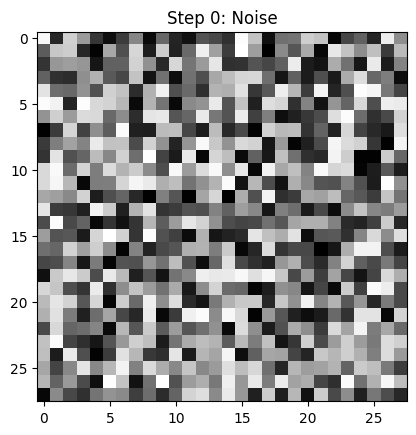

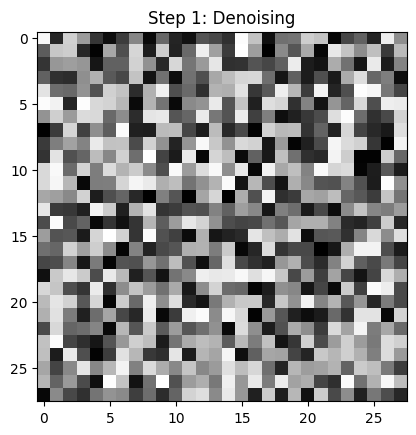

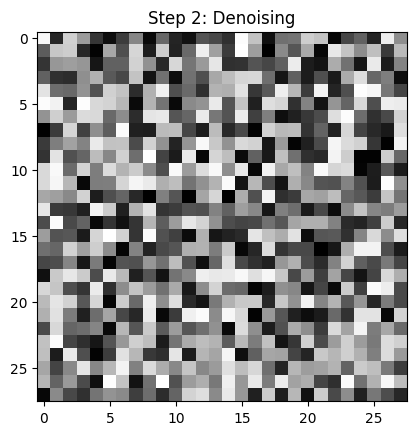

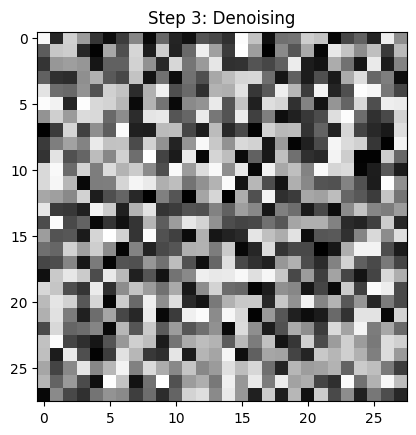

In [10]:
import matplotlib.pyplot as plt

image = np.random.rand(28, 28)
plt.imshow(image, cmap='gray')
plt.title("Step 0: Noise")
plt.show()

for step in range(1, 4):
    image = image * 0.9  # reduce noise
    plt.imshow(image, cmap='gray')
    plt.title(f"Step {step}: Denoising")
    plt.show()


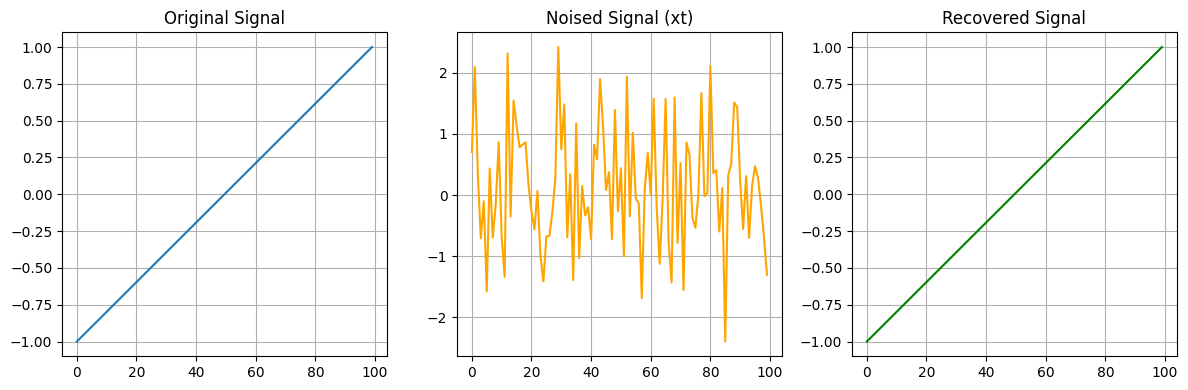

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# 1. Original Data: a simple 1D signal
# -------------------------------------------
x0 = np.linspace(-1, 1, 100)  # Clean signal

# -------------------------------------------
# 2. Diffusion Parameters
# -------------------------------------------
T = 10  # Number of timesteps
noise_schedule = np.linspace(1.0, 0.01, T)  # Linear noise schedule

# -------------------------------------------
# 3. Forward Diffusion Process: Add noise
# -------------------------------------------
xt = x0.copy()
noises = []  # Store noise for denoising

for t in range(T):
    noise = np.random.randn(*x0.shape)
    alpha = noise_schedule[t]
    xt = np.sqrt(alpha) * xt + np.sqrt(1 - alpha) * noise
    noises.append(noise)  # Save the noise

# xt now contains the fully noised signal after T steps

# -------------------------------------------
# 4. Reverse Process: Denoising
# -------------------------------------------
def denoise(xt, t, noise_schedule, noise_pred):
    alpha = noise_schedule[t]
    return (xt - np.sqrt(1 - alpha) * noise_pred) / np.sqrt(alpha)

xt_denoised = xt.copy()

# Reverse diffusion: start from noisy and denoise step by step
for t in reversed(range(T)):
    xt_denoised = denoise(xt_denoised, t, noise_schedule, noises[t])

# -------------------------------------------
# 5. Visualization
# -------------------------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x0, label='x0 (clean)')
plt.title("Original Signal")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(xt, label='xt (noisy)', color='orange')
plt.title("Noised Signal (xt)")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(xt_denoised, label='Denoised', color='green')
plt.title("Recovered Signal")
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
from scipy.linalg import sqrtm
import numpy as np

def calculate_fid(mu1, sigma1, mu2, sigma2):
    diff = mu1 - mu2
    covmean = sqrtm(sigma1.dot(sigma2))
    fid = diff.dot(diff) + np.trace(sigma1 + sigma2 - 2 * covmean)
    return np.real(fid)

mu1, sigma1 = np.random.rand(3), np.eye(3)
mu2, sigma2 = np.random.rand(3), np.eye(3)

print("FID Score:", calculate_fid(mu1, sigma1, mu2, sigma2))


FID Score: 0.8056538473642132


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Generate synthetic data
data = np.random.randint(0, 255, (10, 5))
print("Original Data:\n", data)
# Scale data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print("Scaled Data:\n", scaled_data)

Original Data:
 [[171 226  68 129 150]
 [172 209  86 208 197]
 [167  91 166 228 254]
 [227 147  92 110  28]
 [ 22  31 208  43  97]
 [ 54 188 203  87  31]
 [ 21 105 234 176  45]
 [213 206 182 186 201]
 [ 30 250  82 220 116]
 [166  49 210 198 233]]
Scaled Data:
 [[0.72815534 0.89041096 0.         0.46486486 0.53982301]
 [0.73300971 0.81278539 0.10843373 0.89189189 0.74778761]
 [0.70873786 0.2739726  0.59036145 1.         1.        ]
 [1.         0.52968037 0.14457831 0.36216216 0.        ]
 [0.00485437 0.         0.84337349 0.         0.30530973]
 [0.16019417 0.71689498 0.81325301 0.23783784 0.01327434]
 [0.         0.33789954 1.         0.71891892 0.07522124]
 [0.93203883 0.79908676 0.68674699 0.77297297 0.76548673]
 [0.04368932 1.         0.08433735 0.95675676 0.38938053]
 [0.7038835  0.08219178 0.85542169 0.83783784 0.90707965]]
